# Практическая работа №1
## Тема: применение методов динамического программирования для решения практической задачи
Вариант 36 (473)

Выполнил студент гр.1374 Дюков Николай.

Преподаватель: Пономарев Андрей Васильевич

## ***Цель работы***
Решить практическую задачу с помощью применения методов динамического программирования

**Актуальное индивидуальное задание**

На предприятии вкладываются средства в развитие двух цехов. Функции дохода от вложенных средств для 1-го и 2-го цехов различны и представлены следующими зависимостями:

- для 1-го цеха y = $60+1.3\cdot x^{\frac{2}{3}}$

- для 2-го цеха y = $70+0.8\cdot x^{\frac{2}{3}}$

где y - доход за один квартал (млн. руб); x - количество средств, вложенных за один квартал.

Функции остатка средств за один квартал равны:

- для 1-го цеха $0.72\cdot x$

- для 2-го цеха $0.6\cdot x$

Количество средств, выделяемых на развитие обоих цехов в течение года, составляет 185 единиц. Средства перераспределяются поквартально и не резервируются.

 Требуется оптимально распределить между двумя цехами средства на планируемый год.


## ***Постановка задачи***
На предприятии есть два цеха, и каждый из них имеет свою функцию дохода и функцию остатка средств за квартал. Требуется оптимально распределить 185 единиц средств между двумя цехами на планируемый год таким образом, чтобы общий доход был максимальным.

## ***Выполнение работы***

**Формализация задачи**


- $x_1$: количество средств, вложенных в 1-й цех за квартал (в единицах)
- $𝑥_2$: количество средств, вложенных во 2-й цех за квартал (в единицах)
- $𝑦_1$: доход за один квартал в 1-м цехе (в миллионах рублей)
- $𝑦_2$: доход за один квартал во 2-м цехе (в миллионах рублей)
- W(S) - максимальный выигрыш для заданного состояния S (в миллионах рублей)

Функции дохода:

- Для 1-го цеха: $𝑦_1 = 60 + 1.3 \cdot x_1^\frac{2}{3}$(млн.руб)
- Для 2-го цеха: $𝑦_2 = 70 + 0.8 \cdot x_2^\frac{2}{3}$(млн.руб)

Функции остатка средств:

- Для 1-го цеха: $q_1 = 0.72 \cdot x_1$(млн.руб)
- Для 2-го цеха: $q_2 = 0.6 \cdot x_2$(млн.руб)


**Целевая функция**

Функциональное уравнение ДП будет выглядеть следующим образом:

$W_i(S_i) = \underset{u_i\in [0,S_i]}{max}\left\{y_1(u_i) + y_2(S_i-u_i) + W_{i+1}(q_1(u_i)+q_2(S_i-u_i)) \right\}$

Целевая функция выбрана таким образом, чтобы учитывать текущий выигрыш и потенциальный выигрыш в будущих периодах. Она позволяет определить оптимальное распределение средств и достичь высокого уровня прибыли за период. Функциональное уравнение описывает процесс принятия решения о том, сколько средств выделить на инвестирование в первый цех $u_i$ при заданном общем объеме доступных средств $S_i$.

**Ограничения**


у нас есть общее ограничение на количество средств, выделяемых на развитие обоих цехов в течение года, которое составляет 185 единиц. Это ограничение выражается уравнением:

- $x_1 + x_2 = 185$
- $x_1 \geq 0$
- $x_2 \geq 0$

которое указывает на то, что сумма средств, вложенных в каждый цех, должна быть равна 185 и в каждый цех не может быть вложено отрицательное количество средств, мы можем или ничего не вложить или вложить какое-то количество средств.

### ***функция Bellman_equation(total_funds)***

В коде функция Bellman_equation(total_funds) вычисляет значение $W_i(S_i)$, где $S_i$ - общее количество средств, доступное для обоих цехов, а $W$ - это матрица, содержащая значения выигрыша для всех возможных комбинаций средств в обоих цехах.

1. Инициализация:

  ` def Bellman_equation(total_funds, quarters):`
      ` W = np.zeros(total_funds + 1)`
      ` policy = np.zeros((total_funds + 1, 2), dtype=int)`
      ` funding_distributions = total_funds`

   В начале функции мы инициализируем два массива:
   - W - массив, который будет хранить максимальный выигрыш для каждого возможного количества средств S (от 0 до total_funds).
   - `policy` - двумерный массив, который будет хранить оптимальное управление (количество средств, выделяемых в первый и второй цехи) для каждого состояния S.
   Также мы инициализируем funding_distributions, которое изначально равно total_funds.

2. Цикл по кварталам:

   `for quarter in range(quarters - 1, -1, -1):`
      ` print(f"Оптимальное решение для {quarter + 1} квартала:")`
       `print(f"Общее количество средств: {funding_distributions}")`
      ` print(f"{'Состояние':<15} {'Управление':<25}")`
      ` optimal_u1, optimal_u2 = None, None`

   Этот цикл идет от quarters - 1 до 0 (включительно), то есть от последнего квартала к первому. Внутри цикла мы выводим информацию о текущем квартале и готовим переменные `optimal_u1` и `optimal_u2`, которые будут хранить оптимальное управление для текущего квартала.

3. Цикл по состояниям S:

  ` for S in range(funding_distributions + 1):`

     `  if S > total_funds:`

          ` continue`

   Этот цикл идет от 0 до `funding_distributions` (включительно). Мы проверяем, что S не превышает `total_funds`, так как нам не нужно рассматривать состояния, которые превышают общее количество средств.

4. Вычисление оптимального управления:

   `def calculate_optimal_control(current_funds):`

       `gains = []`

        `for u1 in range(int(q1(S)) + 1):`

           `u2 = S - u1`

           `next_fund = round(q1(u1) + q2(u2))`

           `next_w = W[next_fund] if next_fund <= total_funds else 0`

           `gain = y1(u1) + y2(u2) + next_w`

           `gains.append(gain)`

       `optimal_u1 = np.argmax(gains)`

       `return optimal_u1, S - optimal_u1`

   optimal_u1, optimal_u2 = calculate_optimal_control(S)`

   Внутри этого цикла мы определяем функцию `calculate_optimal_control`, которая вычисляет оптимальное управление для текущего состояния S. Она перебирает все возможные значения u1 от 0 до q1(S) (округленные вниз до целых), вычисляет соответствующее u2 как S - u1, вычисляет next_fund - количество средств, доступных в следующем квартале, и next_w - максимальный выигрыш, достижимый из этого состояния. Затем она вычисляет суммарный выигрыш `gain = y1(u1) + y2(u2) + next_w` и запоминает его в gains. Наконец, она находит индекс максимального элемента в gains, который и будет `optimal_u1`, а `optimal_u2` вычисляется как S - `optimal_u1`.

5. Обновление политики и выигрыша:

   `policy[S] = [optimal_u1, optimal_u2]`

   `next_fund = round(q1(optimal_u1) + q2(optimal_u2))`

   `max_next_w = np.max(W[next_fund:total_funds + 1]) if next_fund <= total_funds else 0`

   `W[S] = y1(optimal_u1) + y2(optimal_u2) + max_next_w`

   `funding_distributions = next_fund`

   После вычисления оптимального управления, мы сохраняем его в `policy[S]`. Затем мы вычисляем `next_fund` - количество средств, доступных в следующем квартале, как сумму `q1(optimal_u1)` и `q2(optimal_u2)`. Далее, мы вычисляем максимальный выигрыш, достижимый из состояния next_fund, и сохраняем его в W[S]. Наконец, мы обновляем `funding_distributions` на `next_fund`.

6. Вывод текущего состояния:

   print(f"{S:<15} {str([policy[S][0], policy[S][1]]):<25}")

7. Вывод оптимального управления для квартала:

   `print(f"Выбранное управление: {[int(q1(optimal_u1)), int(q2(optimal_u2))]}")`

   После завершения цикла по состояниям S, мы выводим оптимальное управление, выбранное для текущего квартала.

8. Вывод оптимального решения:

   `S = total_funds`

   `optimal_allocation = policy[S]`

  ` print("\nОптимальное решение:")`

  ` print(f"Общее количество средств на год: {total_funds}")`

  ` print(f"Выигрыш: {W[S]}")`

   `print(f"Принимаемое управление на первом шаге: {optimal_allocation}")`

   Наконец, после завершения всех кварталов, мы выводим оптимальное решение для всего года. Берем состояние `S = total_funds`, так как это конечное состояние, и выводим общее количество средств, максимальный выигрыш и оптимальное управление на первом шаге.

В конце функция возвращает массивы W и policy, которые содержат соответственно максимальный выигрыш и оптимальное управление для всех возможных состояний.




### ***Приложение***

Оптимальное решение для 4 квартала:
Общее количество средств: 185
Состояние       Управление               
0               [0, 0]                   
1               [0, 1]                   
2               [1, 1]                   
3               [2, 1]                   
4               [2, 2]                   
5               [3, 2]                   
6               [4, 2]                   
7               [5, 2]                   
8               [5, 3]                   
9               [6, 3]                   
10              [7, 3]                   
11              [7, 4]                   
12              [8, 4]                   
13              [9, 4]                   
14              [10, 4]                  
15              [10, 5]                  
16              [11, 5]                  
17              [12, 5]                  
18              [12, 6]                  
19              [13, 6]                  
20              [14, 6]                  
21        

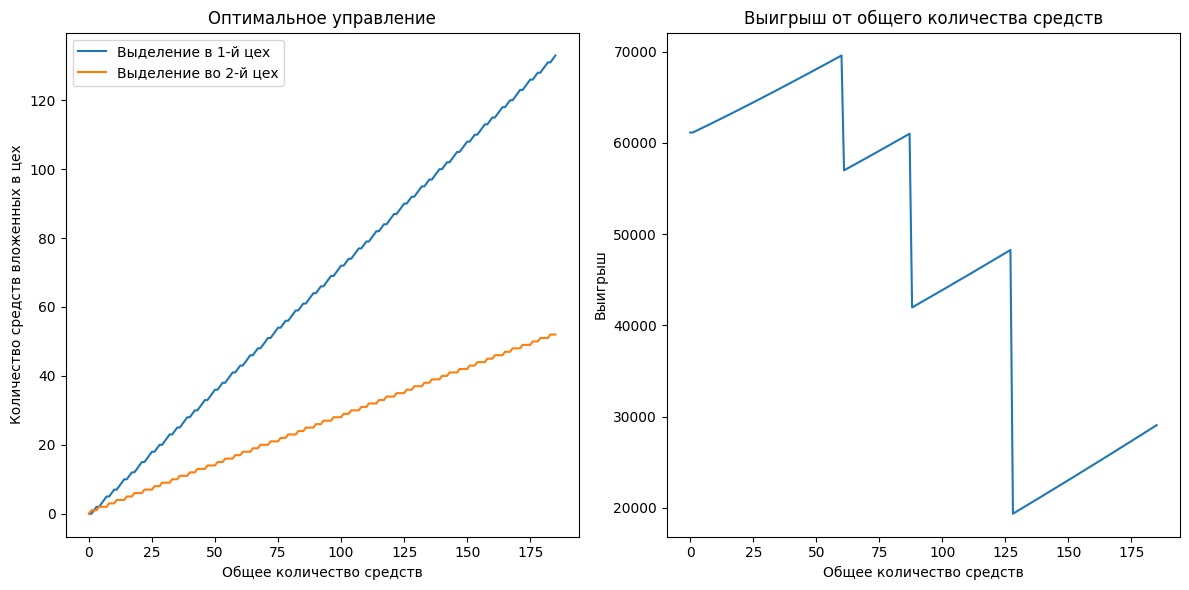

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def y1(x1):
    return 60 + 1.3 * (x1 ** (2 / 3))

def y2(x2):
    return 70 + 0.8 * (x2 ** (2 / 3))

def q1(x1):
    return 0.72 * x1

def q2(x2):
    return 0.6 * x2

def Bellman_equation(total_funds, quarters):
    W = np.zeros(total_funds + 1)
    policy = np.zeros((total_funds + 1, 2), dtype=int)
    funding_distributions = total_funds

    for quarter in range(quarters - 1, -1, -1):
        print(f"Оптимальное решение для {quarter + 1} квартала:")
        print(f"Общее количество средств: {funding_distributions}")
        print(f"{'Состояние':<15} {'Управление':<25}")
        optimal_u1, optimal_u2 = None, None
        for S in range(funding_distributions + 1):
            if S > total_funds:
                continue

            def calculate_optimal_control(current_funds):
                gains = []
                for u1 in range(int(q1(S)) + 1):
                    u2 = S - u1
                    next_fund = round(q1(u1) + q2(u2))
                    next_w = W[next_fund] if next_fund <= total_funds else 0
                    gain = y1(u1) + y2(u2) + next_w
                    gains.append(gain)
                optimal_u1 = np.argmax(gains)
                return optimal_u1, S - optimal_u1

            optimal_u1, optimal_u2 = calculate_optimal_control(S)
            policy[S] = [optimal_u1, optimal_u2]
            next_fund = round(q1(optimal_u1) + q2(optimal_u2))

            max_next_w = np.max(W[next_fund:total_funds + 1]) if next_fund <= total_funds else 0
            W[S] = y1(optimal_u1) + y2(optimal_u2) + max_next_w

            funding_distributions = next_fund

            print(f"{S:<15} {str([policy[S][0], policy[S][1]]):<25}")

        print(f"Выбранное управление: {[int(q1(optimal_u1)), int(q2(optimal_u2))]}")

    S = total_funds
    optimal_allocation = policy[S]
    print("\nОптимальное решение:")
    print(f"Общее количество средств на год: {total_funds}")
    print(f"Выигрыш: {W[S]}")
    print(f"Принимаемое управление на первом шаге: {optimal_allocation}")

    return W, policy

total_funds = 185
quarters = 4

W, policy = Bellman_equation(total_funds, quarters)

def plot_results(W, policy):
    plt.figure(figsize=(12, 6))
    S_values = np.arange(len(W))
    U1_values = policy[:, 0]
    U2_values = policy[:, 1]

    plt.subplot(1, 2, 1)
    plt.plot(S_values, U1_values, label='Выделение в 1-й цех')
    plt.plot(S_values, U2_values, label='Выделение во 2-й цех')
    plt.xlabel('Общее количество средств')
    plt.ylabel('Количество средств вложенных в цех')
    plt.title('Оптимальное управление')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(S_values, W)
    plt.xlabel('Общее количество средств')
    plt.ylabel('Выигрыш')
    plt.title('Выигрыш от общего количества средств')

    plt.tight_layout()
    plt.show()

plot_results(W, policy)

## ***Вывод***


Результаты решения представлены в таблице и отражают выигрыш в каждом квартале для обоих цехов при оптимальном распределении средств.

Исследуя результат работы, можем сделать вывод о том, чтобы максимизировать доход с двух цехов (тоговый выигрыш) оптимальным распределением средств будет являться вложения:

*   1 квартал: Цех №1 - 133 ед., Цех №2 - 52 ед.
*   1 квартал: Цех №1 - 95 ед., Цех №2 - 31 ед.
*   1 квартал: Цех №1 - 65 ед., Цех №2 - 21 ед.
*   1 квартал: Цех №1 - 44 ед., Цех №2 - 15 ед.

В завершении расчетов, итоговый выигрыш, полученный при оптимальном распределении средств и выполнении стратегии, составит 29065 млн. рублей.